# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

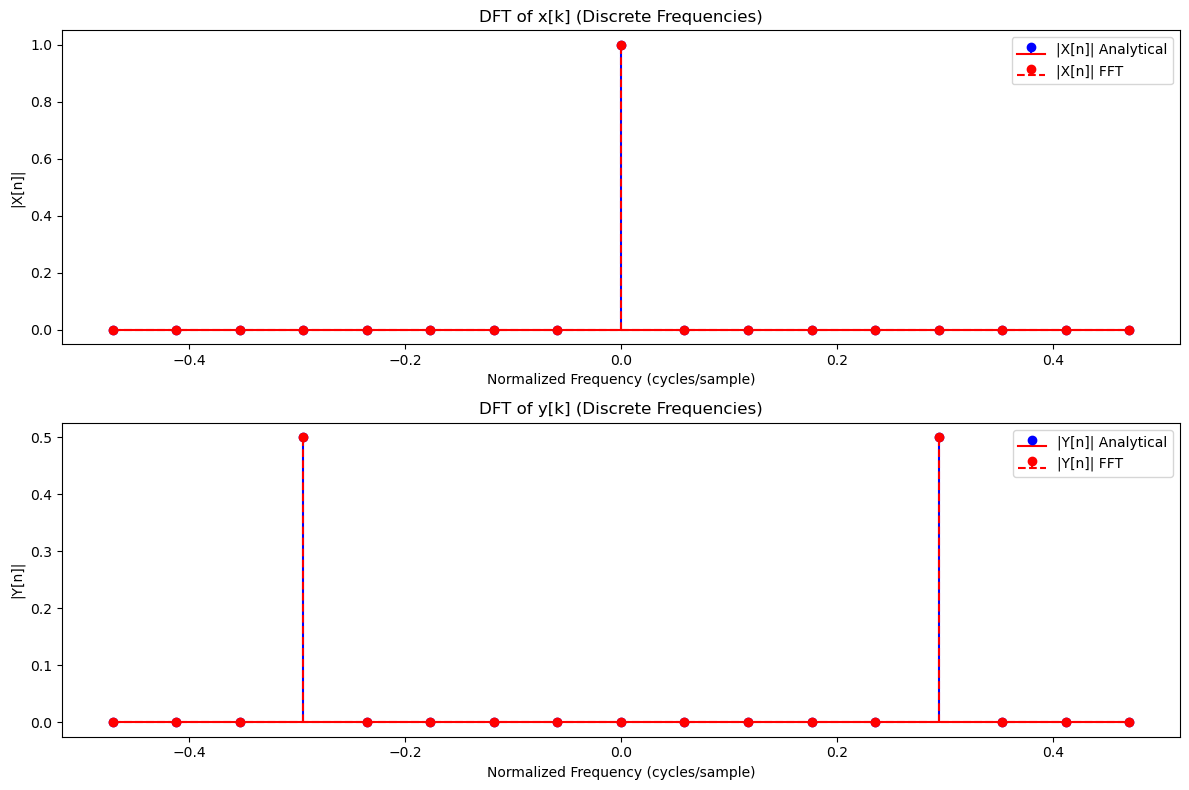

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Variant 2 values
N = 17
n0 = 5

# Define the sequences x[k] and y[k]
x = np.array([1 for k in range(N)])  # x[k] is a sequence of ones

# Compute y[k] using the given formula
y = x * np.cos(2 * np.pi * np.arange(N) * n0 / N)

# Analytical DFT calculation (from the formula)
def analytical_dft(x, N):
    X = []
    for n in range(N):
        sum_val = 0
        for k in range(N):
            sum_val += x[k] * np.exp(-1j * 2 * np.pi * n * k / N)
        X.append(sum_val / N)
    return np.array(X)

# Compute analytical DFTs
X_analytical = analytical_dft(x, N)
Y_analytical = analytical_dft(y, N)

# Compute DFT using np.fft.fft()
X_fft = np.fft.fft(x) / N
Y_fft = np.fft.fft(y) / N

# Plot the results
discrete_freqs = np.fft.fftfreq(N)  # Discrete frequency bins (normalized)

# Plot |X[n]| and |Y[n]| for both analytical and FFT
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem(discrete_freqs, np.abs(X_analytical), 'b', markerfmt='bo', basefmt='r-', label='|X[n]| Analytical')
plt.stem(discrete_freqs, np.abs(X_fft), 'r', markerfmt='ro', basefmt='r--', label='|X[n]| FFT', linefmt='r--')
plt.title("DFT of x[k] (Discrete Frequencies)")
plt.xlabel("Normalized Frequency (cycles/sample)")
plt.ylabel("|X[n]|")
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(discrete_freqs, np.abs(Y_analytical), 'b', markerfmt='bo', basefmt='r-', label='|Y[n]| Analytical')
plt.stem(discrete_freqs, np.abs(Y_fft), 'r', markerfmt='ro', basefmt='r--', label='|Y[n]| FFT', linefmt='r--')
plt.title("DFT of y[k] (Discrete Frequencies)")
plt.xlabel("Normalized Frequency (cycles/sample)")
plt.ylabel("|Y[n]|")
plt.legend()

plt.tight_layout()
plt.show()




## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

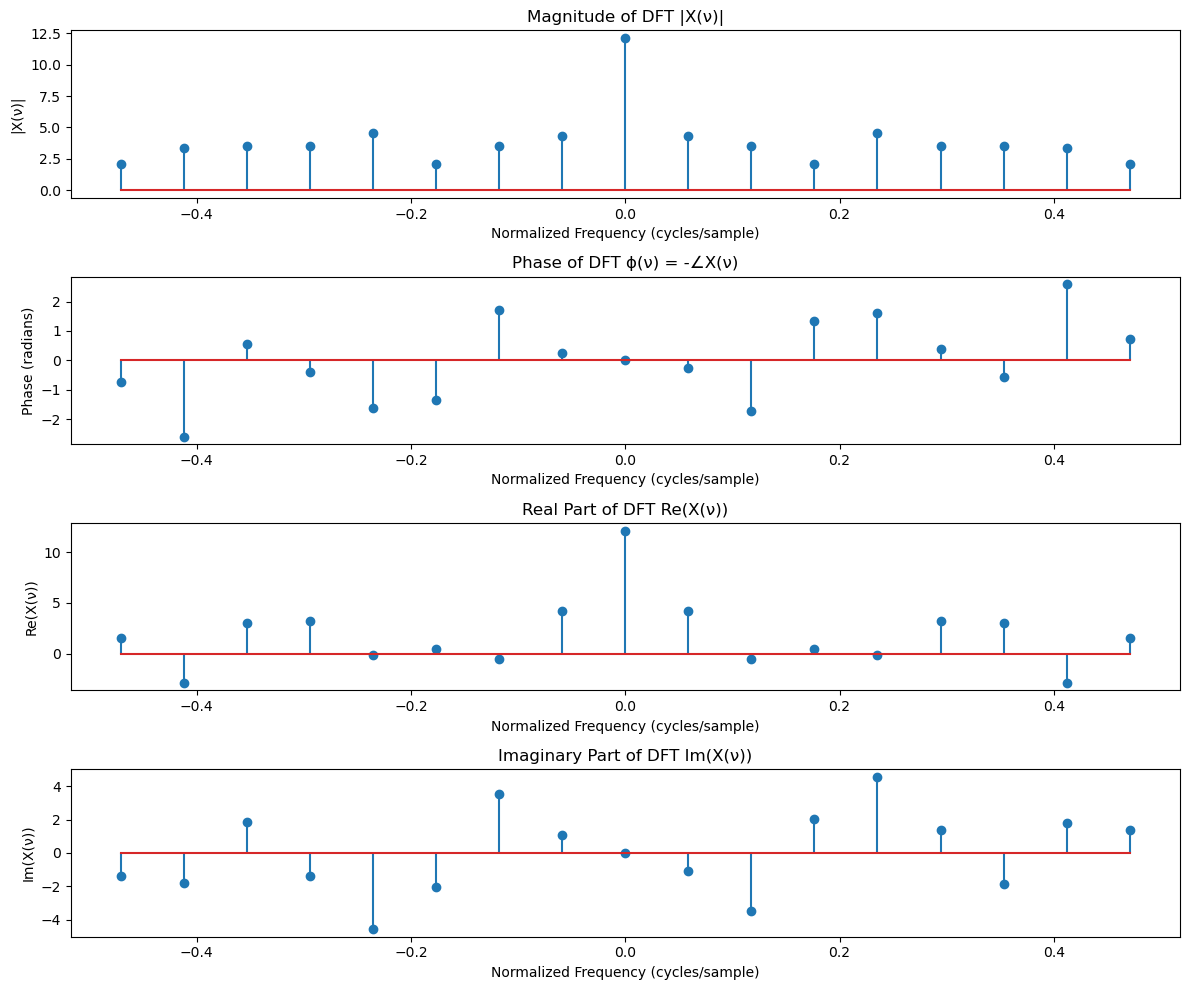

Check if the real part is symmetric and the imaginary part is antisymmetric:
Real part is symmetric: True
Imaginary part is antisymmetric: True


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Variant 2: N = 17
N = 17

# Create an arbitrary real-valued sequence x[k]
np.random.seed(0)  # For reproducibility
x = np.random.randn(N)

# Compute the DFT using np.fft.fft
X = np.fft.fft(x)

# Get the frequencies (normalized)
frequencies = np.fft.fftfreq(N)

# Shift the zero frequency to the center for better visualization
X_shifted = np.fft.fftshift(X)
frequencies_shifted = np.fft.fftshift(frequencies)

# Magnitude of DFT
magnitude = np.abs(X_shifted)

# Phase of DFT (in radians)
phase = np.angle(X_shifted)

# Real part of DFT
real_part = np.real(X_shifted)

# Imaginary part of DFT
imag_part = np.imag(X_shifted)

# Plot the results
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.stem(frequencies_shifted, magnitude)
plt.title("Magnitude of DFT |X(ν)|")
plt.xlabel("Normalized Frequency (cycles/sample)")
plt.ylabel("|X(ν)|")

plt.subplot(4, 1, 2)
plt.stem(frequencies_shifted, phase)
plt.title("Phase of DFT ϕ(ν) = -∠X(ν)")
plt.xlabel("Normalized Frequency (cycles/sample)")
plt.ylabel("Phase (radians)")

plt.subplot(4, 1, 3)
plt.stem(frequencies_shifted, real_part)
plt.title("Real Part of DFT Re(X(ν))")
plt.xlabel("Normalized Frequency (cycles/sample)")
plt.ylabel("Re(X(ν))")

plt.subplot(4, 1, 4)
plt.stem(frequencies_shifted, imag_part)
plt.title("Imaginary Part of DFT Im(X(ν))")
plt.xlabel("Normalized Frequency (cycles/sample)")
plt.ylabel("Im(X(ν))")

plt.tight_layout()
plt.show()

# Check symmetry and antisymmetry
print("Check if the real part is symmetric and the imaginary part is antisymmetric:")
real_symmetric = np.allclose(real_part, real_part[::-1])
imag_antisymmetric = np.allclose(imag_part, -imag_part[::-1])
print(f"Real part is symmetric: {real_symmetric}")
print(f"Imaginary part is antisymmetric: {imag_antisymmetric}")



# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

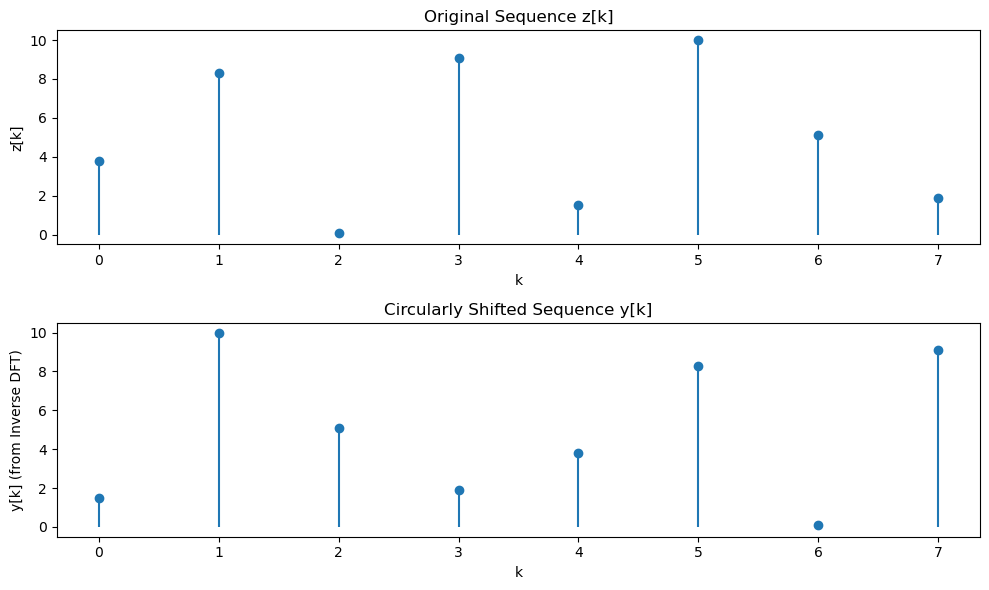

Original sequence z[k]: [ 3.8  8.3  0.1  9.1  1.5 10.   5.1  1.9]
Circularly shifted sequence y[k]: [ 1.5 10.   5.1  1.9  3.8  8.3  0.1  9.1]
Reconstructed y[k] from Inverse DFT: [ 1.5 10.   5.1  1.9  3.8  8.3  0.1  9.1]


In [18]:
# Second Code Version
import numpy as np
import matplotlib.pyplot as plt

# Variant 2 data
z = np.array([3.8, 8.3, 0.1, 9.1, 1.5, 10.0, 5.1, 1.9])  # z[k]
n0 = 4  # Shift amount
N = len(z)  # Sequence length (l = 8)

# Compute the DFT of z[k]
Z = np.fft.fft(z)

# Perform the circular shift using np.roll
y = np.roll(z, n0)

# Compute the DFT of y[k] analytically (no need to compute it directly, due to the DFT shift property)
Y = Z * np.exp(-2j * np.pi * np.arange(N) * n0 / N)

# Verify by computing the inverse DFT of Y to get y[k]
y_ifft = np.fft.ifft(Y).real  # Only take the real part because the result should be real

# Plot the original and shifted sequences
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(np.arange(N), z, basefmt=" ")
plt.title("Original Sequence z[k]")
plt.xlabel("k")
plt.ylabel("z[k]")

plt.subplot(2, 1, 2)
plt.stem(np.arange(N), y_ifft, basefmt=" ")
plt.title("Circularly Shifted Sequence y[k]")
plt.xlabel("k")
plt.ylabel("y[k] (from Inverse DFT)")

plt.tight_layout()
plt.show()

# Print the results
print("Original sequence z[k]:", z)
print("Circularly shifted sequence y[k]:", y)
print("Reconstructed y[k] from Inverse DFT:", y_ifft)


## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


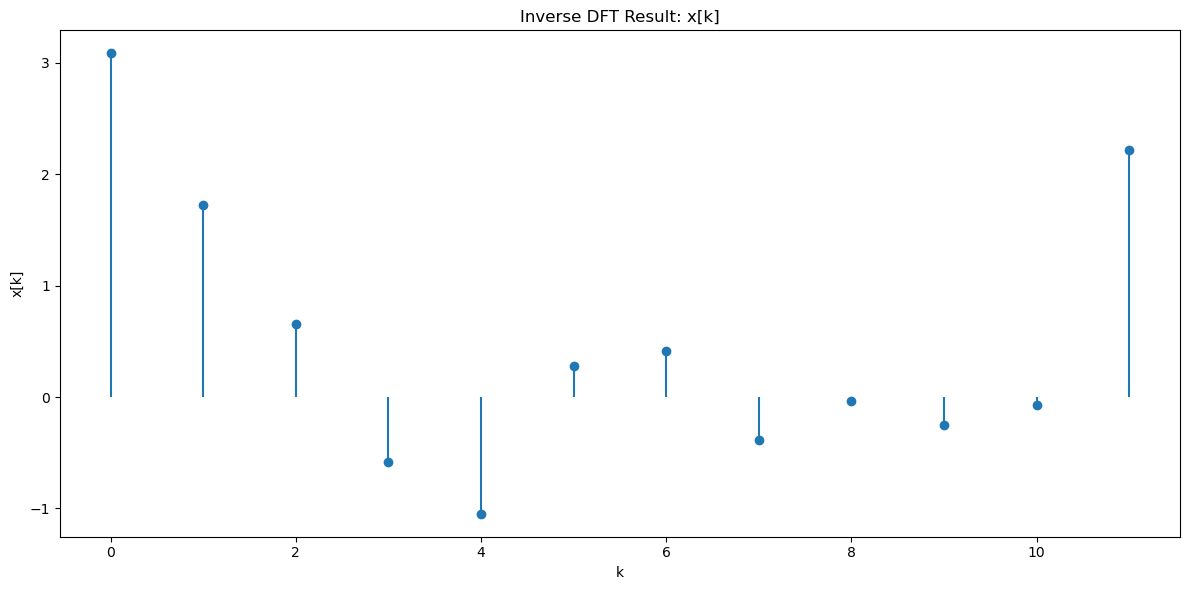

Original sequence x[k]: [ 3.08333333  1.72168784  0.65251058 -0.58333333 -1.04684815  0.27831216
  0.41666667 -0.38237144 -0.03648518 -0.25       -0.06917725  2.21570477]
Average value of x[k]: (0.5+0.41666666666666663j)
Energy of the signal: 48.16666666666665
Power of the periodic continuation: 4.0138888888888875


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given DFT values for variant 2
X = np.array([6 + 5j, 8 + 6j, 5 + 5j, -3 + 4j, 5 + 9j, 0, 0, 0, -3 + 4j, 5 + 5j, 8 + 6j, 6 + 5j])

N = 12  # Period for the DFT

# Step 1: Inverse DFT to find x[k] (using the ifft function)
x = np.fft.ifft(X)

# Step 2: Calculate the average value of x[k]
avg_value = np.mean(x)

# Step 3: Calculate the energy of the signal using Parseval's theorem
energy = np.sum(np.abs(x) ** 2)

# Step 4: Calculate the power for periodic continuation
power = energy / N

# Plot the result
plt.figure(figsize=(12, 6))

# Plot the original signal x[k]
plt.stem(np.arange(N), np.real(x), basefmt=" ")
plt.title("Inverse DFT Result: x[k]")
plt.xlabel("k")
plt.ylabel("x[k]")

plt.tight_layout()
plt.show()

# Print results for reference
print(f"Original sequence x[k]: {np.real(x)}")
print(f"Average value of x[k]: {avg_value}")
print(f"Energy of the signal: {energy}")
print(f"Power of the periodic continuation: {power}")


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

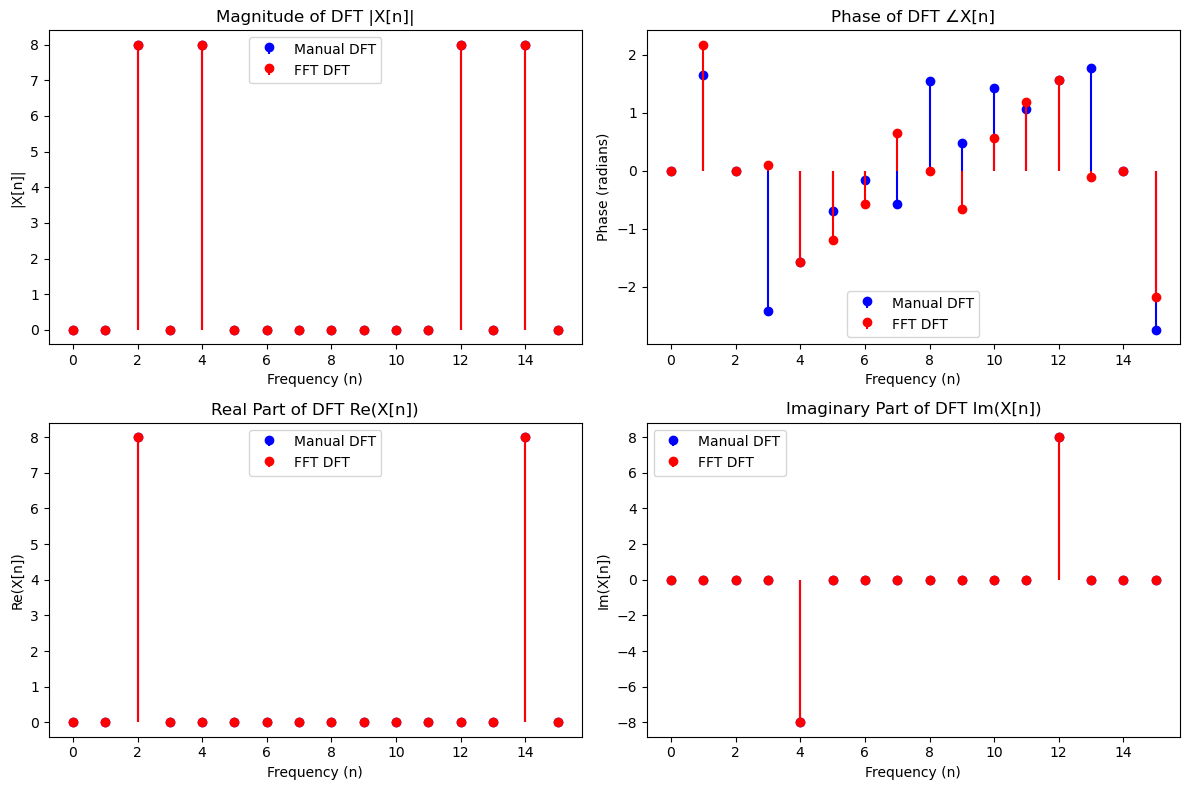

In [14]:
# Re-running the code and focusing on the visual display of manual DFT vs FFT results

import numpy as np
import matplotlib.pyplot as plt

# Given parameters for variant 2
N = 16  # Length of the sequence
r1 = 2  # First frequency
r2 = 4  # Second frequency

# Generate the sequence x[k] based on the given formula
k = np.arange(N)  # Indices 0 to N-1
x = np.cos(2 * np.pi * r1 * k / N) + np.sin(2 * np.pi * r2 * k / N)

# Compute the DFT using the formula (manual calculation)
def dft_manual(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            X[n] += x[k] * np.exp(-2j * np.pi * n * k / N)
    return X

# Calculate DFT using manual method
X_manual = dft_manual(x)

# Calculate DFT using FFT (NumPy's fft function)
X_fft = np.fft.fft(x)

# Plot the results: |X[n]|, Phase, Re(X[n]), Im(X[n])
frequencies = np.arange(N)

# Magnitude comparison (Manual DFT vs FFT)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.stem(frequencies, np.abs(X_manual), basefmt=" ", linefmt='b-', markerfmt='bo', label='Manual DFT')
plt.stem(frequencies, np.abs(X_fft), basefmt=" ", linefmt='r-', markerfmt='ro', label='FFT DFT')
plt.title("Magnitude of DFT |X[n]|")
plt.xlabel("Frequency (n)")
plt.ylabel("|X[n]|")
plt.legend()

# Phase comparison (Manual DFT vs FFT)
plt.subplot(2, 2, 2)
plt.stem(frequencies, np.angle(X_manual), basefmt=" ", linefmt='b-', markerfmt='bo', label='Manual DFT')
plt.stem(frequencies, np.angle(X_fft), basefmt=" ", linefmt='r-', markerfmt='ro', label='FFT DFT')
plt.title("Phase of DFT ∠X[n]")
plt.xlabel("Frequency (n)")
plt.ylabel("Phase (radians)")
plt.legend()

# Real part comparison (Manual DFT vs FFT)
plt.subplot(2, 2, 3)
plt.stem(frequencies, np.real(X_manual), basefmt=" ", linefmt='b-', markerfmt='bo', label='Manual DFT')
plt.stem(frequencies, np.real(X_fft), basefmt=" ", linefmt='r-', markerfmt='ro', label='FFT DFT')
plt.title("Real Part of DFT Re(X[n])")
plt.xlabel("Frequency (n)")
plt.ylabel("Re(X[n])")
plt.legend()

# Imaginary part comparison (Manual DFT vs FFT)
plt.subplot(2, 2, 4)
plt.stem(frequencies, np.imag(X_manual), basefmt=" ", linefmt='b-', markerfmt='bo', label='Manual DFT')
plt.stem(frequencies, np.imag(X_fft), basefmt=" ", linefmt='r-', markerfmt='ro', label='FFT DFT')
plt.title("Imaginary Part of DFT Im(X[n])")
plt.xlabel("Frequency (n)")
plt.ylabel("Im(X[n])")
plt.legend()

plt.tight_layout()
plt.show()


# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



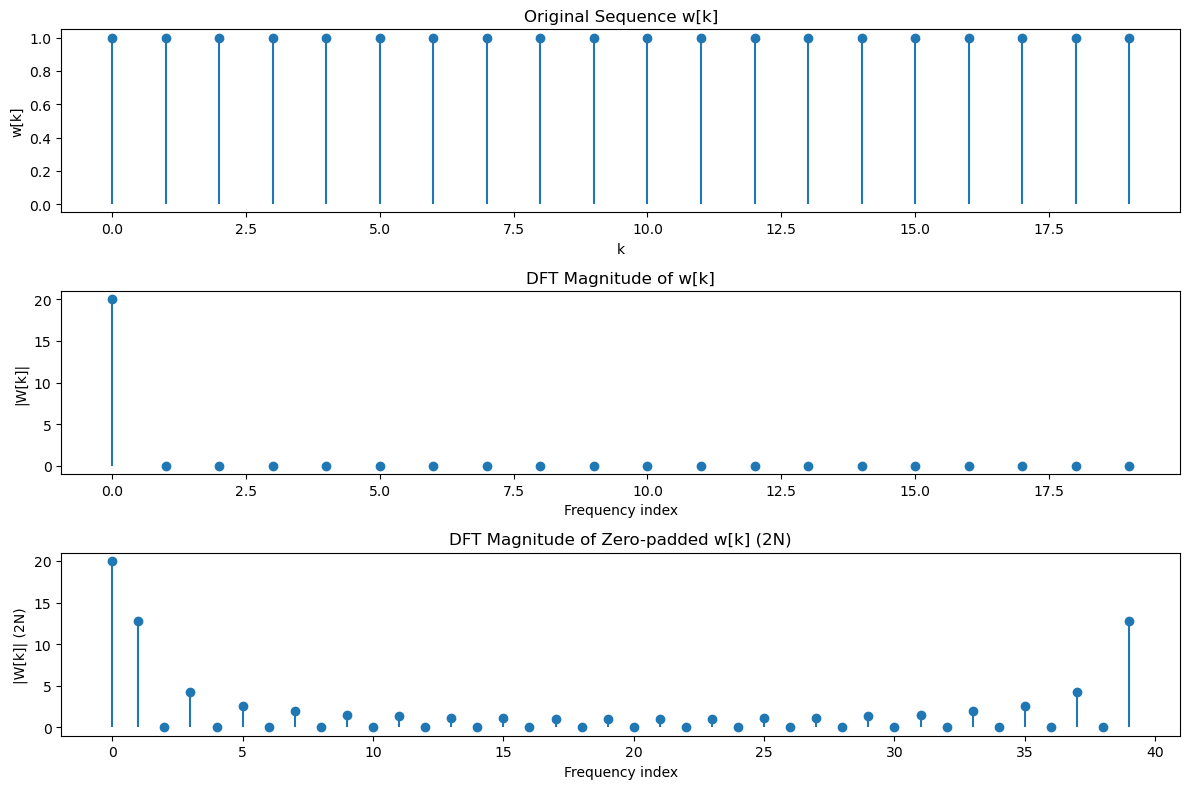

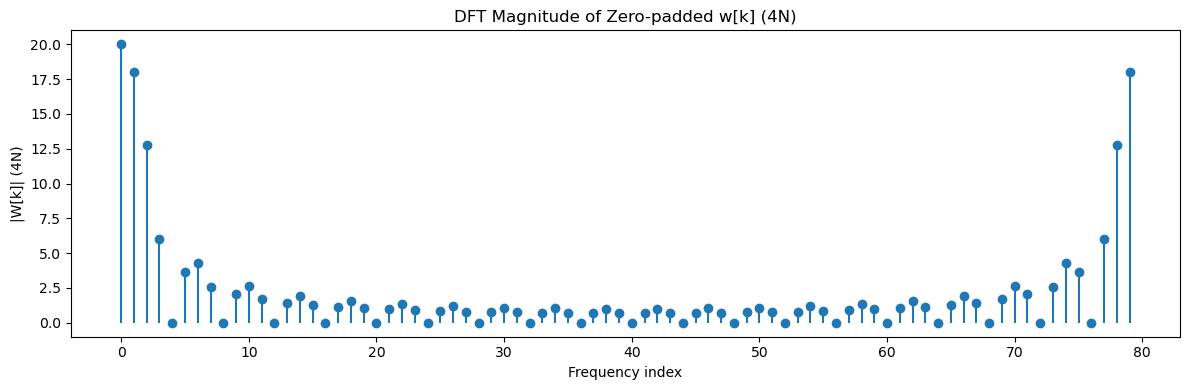

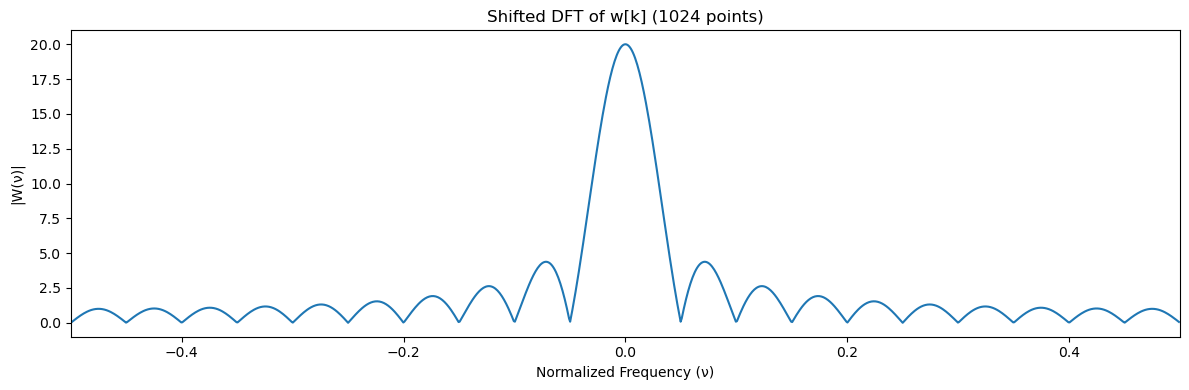

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for variant 2 (N = 20)
N = 20  # Length of the sequence

# Step 1: Create the sequence w[k] (rectangular window of length N)
w = np.ones(N)

# Step 2: Compute the DFT (ДПФ) of w[k]
W_dft = np.fft.fft(w)

# Step 3: Zero-pad w[k] to 2N and compute the DFT
w_padded_2N = np.pad(w, (0, N), 'constant')  # Zero-pad to 2N
W_dft_padded_2N = np.fft.fft(w_padded_2N)

# Step 4: Zero-pad w[k] to 4N and compute the DFT
w_padded_4N = np.pad(w, (0, 3 * N), 'constant')  # Zero-pad to 4N
W_dft_padded_4N = np.fft.fft(w_padded_4N)

# Step 5: Compute FFT for 1024 points and compare
W_dft_1024 = np.fft.fft(w, 1024)

# Step 6: Analytic DFT computation (Direct formula)
def analytic_dft(w, N):
    k = np.arange(N)
    W = np.zeros(1024, dtype=complex)  # We compute the DFT for 1024 points for comparison
    for nu in range(1024):
        W[nu] = np.sum(w * np.exp(-1j * 2 * np.pi * nu * k / 1024))
    return W

W_analytic = analytic_dft(w, N)

# Step 7: Use fftshift for plotting W(ν) in the interval [-0.5, 0.5]
W_dft_shifted = np.fft.fftshift(W_dft_1024)
frequencies = np.fft.fftshift(np.fft.fftfreq(1024))  # Create shifted frequency axis

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot the original sequence w[k]
plt.subplot(3, 1, 1)
plt.stem(np.arange(N), w, basefmt=" ")
plt.title("Original Sequence w[k]")
plt.xlabel("k")
plt.ylabel("w[k]")

# Plot the magnitude of DFT of w[k]
plt.subplot(3, 1, 2)
plt.stem(np.arange(N), np.abs(W_dft), basefmt=" ")
plt.title("DFT Magnitude of w[k]")
plt.xlabel("Frequency index")
plt.ylabel("|W[k]|")

# Plot the magnitude of DFT of zero-padded sequence (2N)
plt.subplot(3, 1, 3)
plt.stem(np.arange(2 * N), np.abs(W_dft_padded_2N), basefmt=" ")
plt.title("DFT Magnitude of Zero-padded w[k] (2N)")
plt.xlabel("Frequency index")
plt.ylabel("|W[k]| (2N)")

plt.tight_layout()
plt.show()

# Plot the DFT of the sequence padded to 4N
plt.figure(figsize=(12, 4))
plt.stem(np.arange(4 * N), np.abs(W_dft_padded_4N), basefmt=" ")
plt.title("DFT Magnitude of Zero-padded w[k] (4N)")
plt.xlabel("Frequency index")
plt.ylabel("|W[k]| (4N)")

plt.tight_layout()
plt.show()

# Plot the comparison of DFT for 1024 points
plt.figure(figsize=(12, 4))
plt.plot(frequencies, np.abs(W_dft_shifted))
plt.title("Shifted DFT of w[k] (1024 points)")
plt.xlabel("Normalized Frequency (ν)")
plt.ylabel("|W(ν)|")
plt.xlim([-0.5, 0.5])

plt.tight_layout()
plt.show()


## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

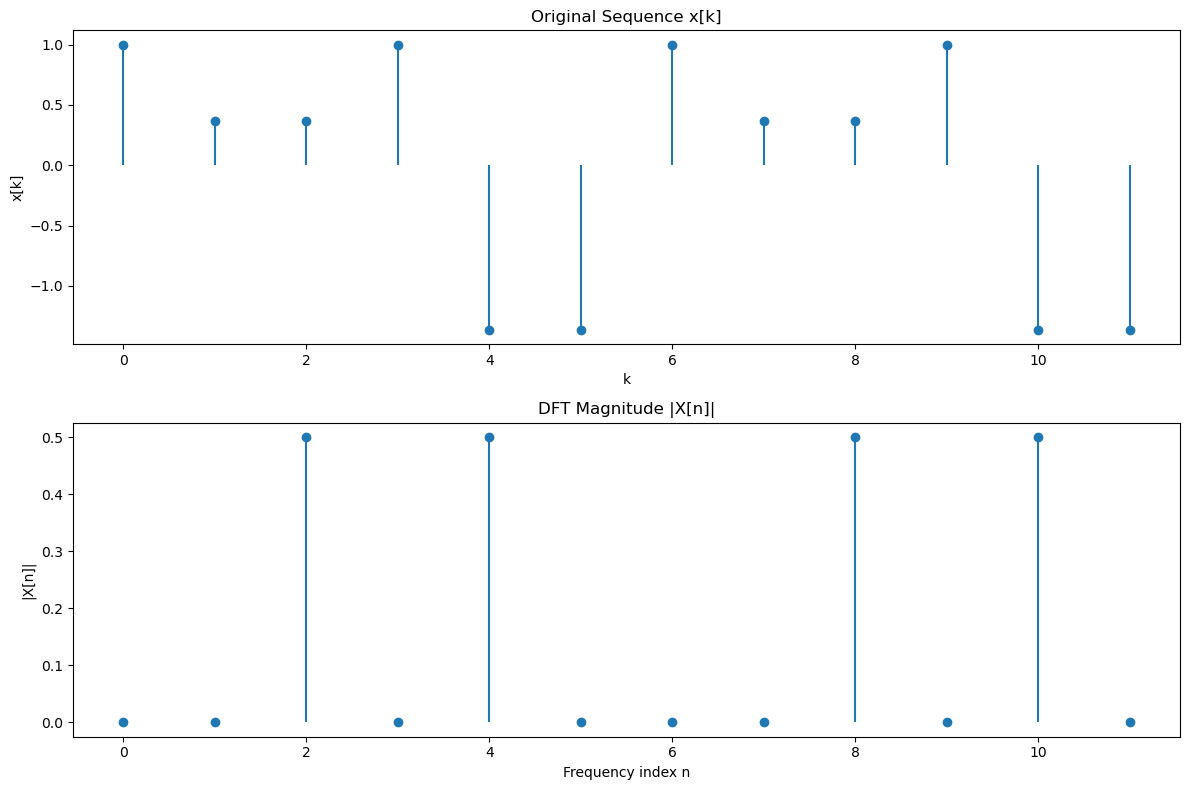

DFT values X[n] (Normalized): [-7.40148683e-17+0.00000000e+00j -2.41609850e-16-2.13611141e-16j
 -1.11022302e-16-5.00000000e-01j  7.40148683e-17-1.94289029e-16j
  5.00000000e-01-3.52543159e-16j  2.23106133e-16+7.48332624e-17j
 -5.12173487e-17+3.70074342e-17j  2.23106133e-16-7.48332624e-17j
  5.00000000e-01+3.52543159e-16j  7.40148683e-17+1.94289029e-16j
 -1.15316105e-16+5.00000000e-01j -2.41609850e-16+2.13611141e-16j]


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for variant 2
N = 12  # Length of the sequence
r1 = 2
r2 = 4

# Step 1: Generate the sequence x[k]
k = np.arange(N)
x = np.sin(2 * np.pi * r1 * k / N) + np.cos(2 * np.pi * r2 * k / N)

# Step 2: Compute the N-point DFT (ДВПФ) using fft
X_dft = np.fft.fft(x) / N  # Normalized DFT

# Step 3: Analytical DFT (Since you want to compare the weights with delta functions)
# The DFT will have two major spikes corresponding to the frequencies of r1 and r2

# Plot the results

plt.figure(figsize=(12, 8))

# Plot the original sequence x[k]
plt.subplot(2, 1, 1)
plt.stem(k, x, basefmt=" ")
plt.title("Original Sequence x[k]")
plt.xlabel("k")
plt.ylabel("x[k]")

# Plot the magnitude of DFT |X[n]|
plt.subplot(2, 1, 2)
plt.stem(np.arange(N), np.abs(X_dft), basefmt=" ")
plt.title("DFT Magnitude |X[n]|")
plt.xlabel("Frequency index n")
plt.ylabel("|X[n]|")

plt.tight_layout()
plt.show()

# Print the analytical DFT results
print("DFT values X[n] (Normalized):", X_dft)


## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

Direct DFT computation time: 0.661719 seconds
FFT computation time: 0.002048 seconds
Maximum error between Direct DFT and FFT: 266.6754463235934


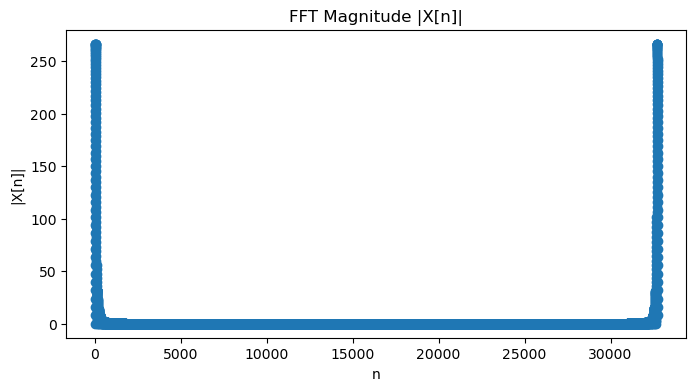

In [17]:
import numpy as np
import time

# Parameters for variant 2
N = 512
P = 32768

# Generate the sequence x[k] = sin(2 * pi * k / N)
k = np.arange(N)
x = np.sin(2 * np.pi * k / N)

# Step 1: Compute the DFT directly using the formula
def dft_direct(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            X[n] += x[k] * np.exp(-2j * np.pi * n * k / N)
    return X

# Timing the direct DFT computation
start_time = time.time()
X_direct = dft_direct(x)
direct_time = time.time() - start_time

# Step 2: Compute the DFT using fft
start_time = time.time()
X_fft = np.fft.fft(x, P)  # Compute DFT with zero-padding to P points
fft_time = time.time() - start_time

# Step 3: Compare the results and timing
error = np.max(np.abs(X_direct - X_fft[:N]))

# Output the results
print(f"Direct DFT computation time: {direct_time:.6f} seconds")
print(f"FFT computation time: {fft_time:.6f} seconds")
print(f"Maximum error between Direct DFT and FFT: {error}")

# Plot the magnitude of the FFT result
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.stem(np.arange(P), np.abs(X_fft), basefmt=" ")
plt.title("FFT Magnitude |X[n]|")
plt.xlabel("n")
plt.ylabel("|X[n]|")
plt.show()


## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

C:\Users\admin\AppData\Local\Temp\ipykernel_12740\1080911058.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read('clarinet.wav')


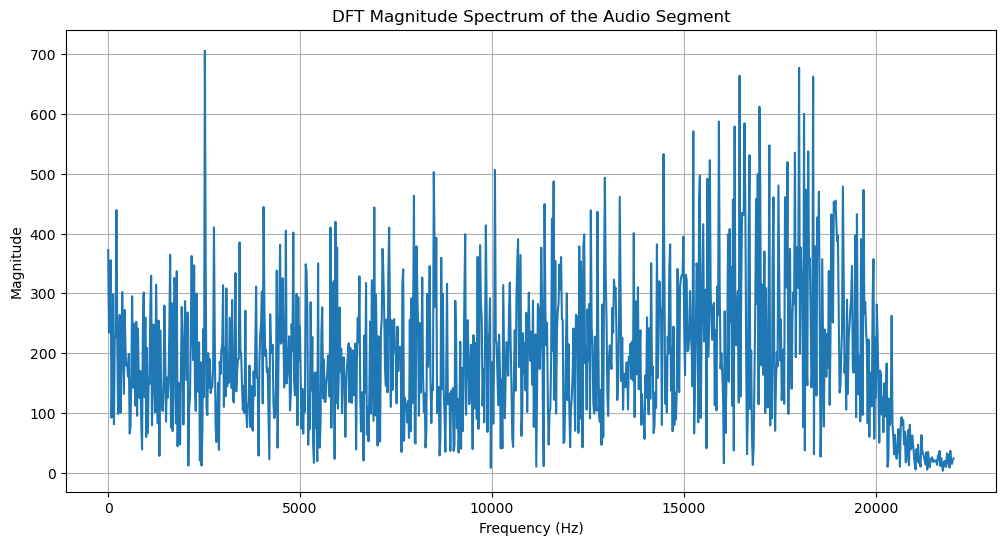

The fundamental frequency is: 2519.38 Hz


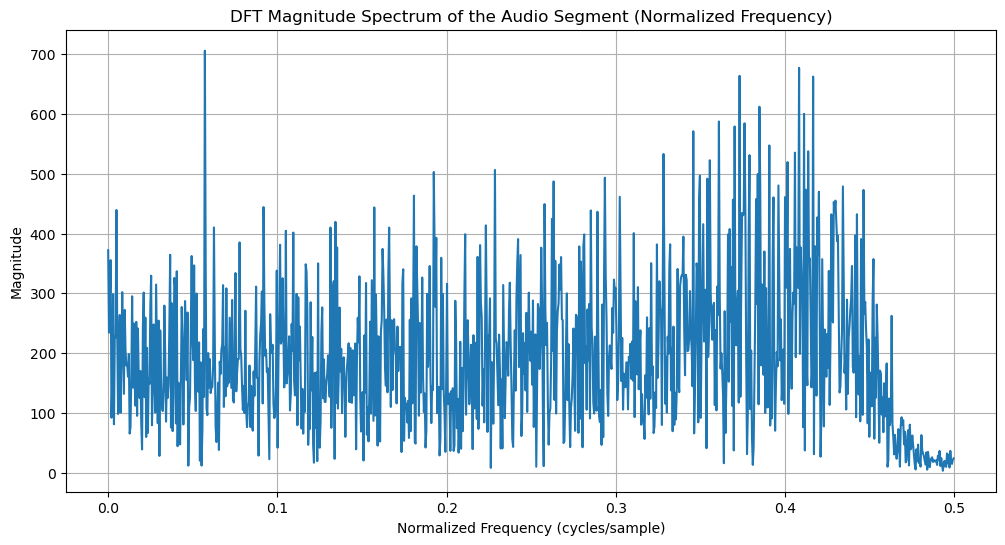

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Step 1: Load the audio file for variant 2 (clarinet.wav)
# Ensure the file path is correct, adjust if needed
sampling_rate, signal = wavfile.read('clarinet.wav')

# Step 2: If the audio is stereo, select one channel (Mono signal)
if len(signal.shape) > 1:
    signal = signal[:, 0]  # Take the first channel

# Step 3: Select an informative part of the signal for analysis
# Example: First 2048 samples. Adjust this based on the audio content.
segment_length = 2048
signal_segment = signal[:segment_length]

# Step 4: Compute the DFT (Discrete Fourier Transform) of the selected segment
signal_dft = np.fft.fft(signal_segment)
frequencies = np.fft.fftfreq(len(signal_segment), 1 / sampling_rate)

# Step 5: Plot the magnitude spectrum (only positive frequencies)
plt.figure(figsize=(12, 6))

plt.plot(frequencies[:len(frequencies)//2], np.abs(signal_dft)[:len(frequencies)//2])
plt.title("DFT Magnitude Spectrum of the Audio Segment")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Step 6: Identify the fundamental frequency
# The fundamental frequency corresponds to the peak in the magnitude spectrum
fundamental_frequency = frequencies[np.argmax(np.abs(signal_dft[:len(frequencies)//2]))]
print(f"The fundamental frequency is: {fundamental_frequency:.2f} Hz")

# Step 4: Compute the DFT (Discrete Fourier Transform) of the selected segment
signal_dft = np.fft.fft(signal_segment)

# Normalized frequency (dividing by sampling rate)
normalized_frequencies = np.fft.fftfreq(len(signal_segment), 1 / sampling_rate) / sampling_rate

# Step 5: Plot the magnitude spectrum (using normalized frequency)
plt.figure(figsize=(12, 6))

# Only plot the positive half of the frequencies
plt.plot(normalized_frequencies[:len(normalized_frequencies)//2], np.abs(signal_dft)[:len(normalized_frequencies)//2])
plt.title("DFT Magnitude Spectrum of the Audio Segment (Normalized Frequency)")
plt.xlabel("Normalized Frequency (cycles/sample)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()
